In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.preprocessing
import sklearn.decomposition
from sklearn.cluster import KMeans

import utils


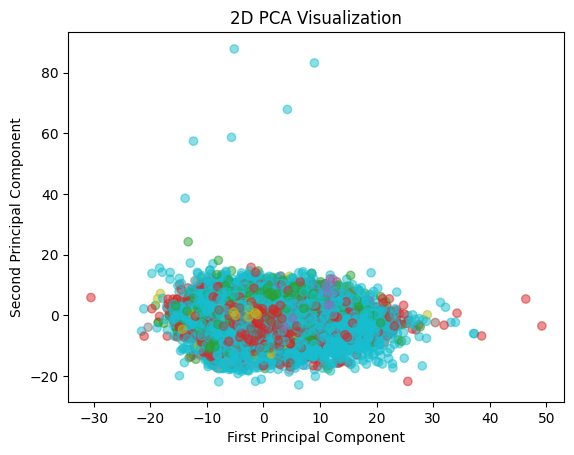

In [13]:
AUDIO_DIR = os.environ.get("AUDIO_DIR")

# Load metadata and features
tracks = pd.read_csv("data/fma_metadata/tracks.csv", index_col=0, header=[0, 1])
features = pd.read_csv("data/fma_metadata/features.csv", index_col=0, header=[0, 1, 2])

# Use the small subset of the FMA dataset
small = tracks["set", "subset"] <= "small"

# Select the features and the target variable (genres)
X = features.loc[small, "mfcc"]
y = tracks.loc[small, ("track", "genre_top")]

# Standardize the features
scaler = skl.preprocessing.StandardScaler(copy=False)
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dimensionality
pca = skl.decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Encode the genres as integer labels for coloring the scatter plot
label_encoder = skl.preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Plot the 2D PCA visualization of the data with the reduced dimensions
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap="tab10", alpha=0.5)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("2D PCA Visualization")
plt.show()


/Users/adamazoulay/Desktop/AI-Project/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


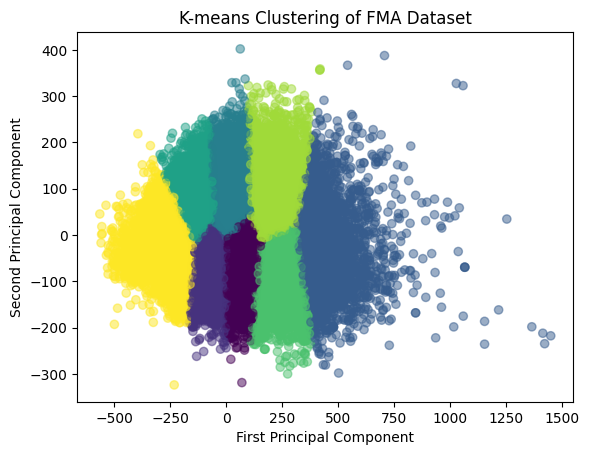

In [14]:
# Perform PCA on features
small = tracks["set", "subset"] <= "small"
X = features.loc[small, "mfcc"]
X_pca = skl.decomposition.PCA(n_components=2).fit_transform(X)

# Choose the number of clusters, e.g., based on the number of genres
k = 8

# Create a K-means clustering model and fit it to the reduced features
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)

# Predict cluster assignments
cluster_assignments = kmeans.predict(X_pca)

# Visualize the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_assignments, cmap="viridis", alpha=0.5)
plt.title("K-means Clustering of FMA Dataset")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()


/Users/adamazoulay/Desktop/AI-Project/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


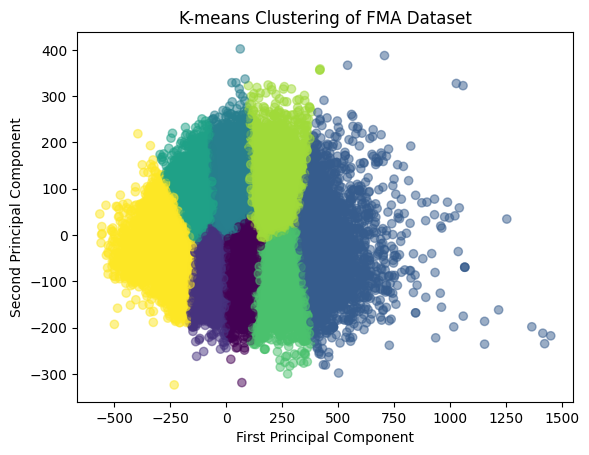

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.preprocessing, sklearn.decomposition, sklearn.cluster

# Load metadata and features.
tracks = pd.read_csv("data/fma_metadata/tracks.csv", index_col=0, header=[0, 1])
features = pd.read_csv("data/fma_metadata/features.csv", index_col=0, header=[0, 1, 2])

# Select a subset of the data
small = tracks["set", "subset"] <= "small"

# Perform PCA on the features
X = features.loc[small, "mfcc"]
X_pca = skl.decomposition.PCA(n_components=2).fit_transform(X)

# Choose the number of clusters
k = 8

# Create a K-means clustering model and fit it to the reduced features
kmeans = skl.cluster.KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)

# Predict cluster assignments
cluster_assignments = kmeans.predict(X_pca)

# Visualize the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_assignments, cmap="viridis", alpha=0.5)
plt.title("K-means Clustering of FMA Dataset")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()
